In [1]:
# https://medium.com/@andres.tellez/my-first-time-using-streamlit-building-a-simple-and-interactive-ml-app-44dd0a06fd98
# https://storm.genie.stanford.edu/article/make-an-article-about-the-best-future-proof-jobs-in-singapore-market.-%0A-449464 


In [2]:
#Data management
import numpy as np
import pandas as pd

#Graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Data exploration
import missingno as ms

#Web app
import streamlit as st

In [3]:
!pip install streamlit

In [4]:
!pip install requests
import requests

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
response = requests.get(url)
open('insurance.csv', 'wb').write(response.content)

54288

In [5]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
st.write('Hello, *World!* :sunglasses:')
st.write("Hello, Streamlit!")
st.header("This is a header")
st.subheader("This is a subheader")
st.title("This is a title")

code = '''
def hello_world():
    print("Hello, World!")
'''
st.code(code, language="python")

st.title("This is a title")

image = "https://www.w3schools.com/w3images/lights.jpg"
st.image(image, caption='Beautiful Lights')

# Add content to the side bar
st.sidebar.header("Sidebar")
st.sidebar.subheader("Settings")

st.title("This is a title")

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
st.pyplot(plt)

Overwriting app.py


0.7603342038634843


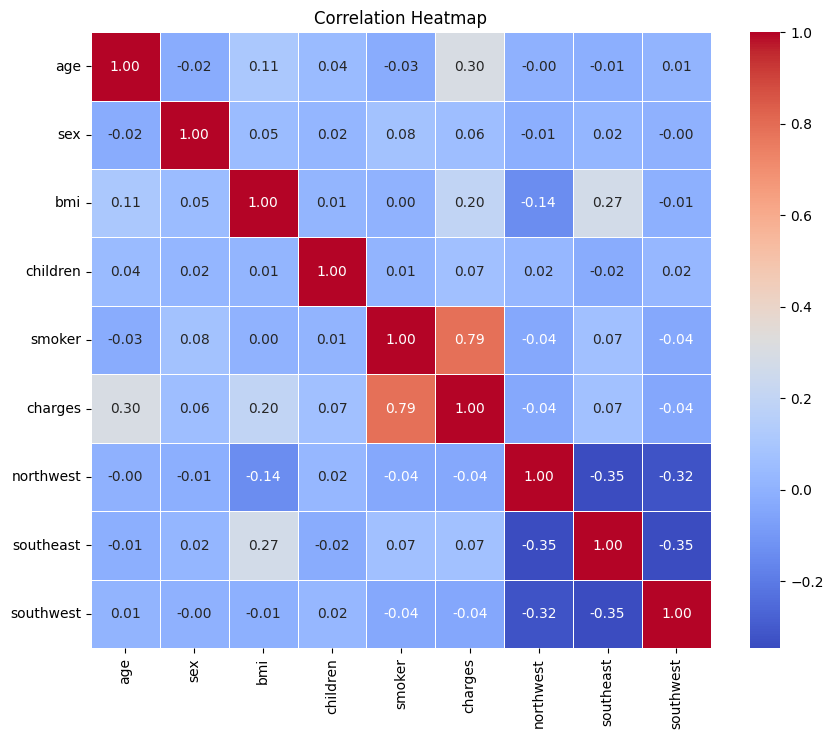

In [6]:
insurance_df = pd.read_csv("insurance.csv")

# # First 5 observations
# st.write(insurance_df.head())

# Number of observations
rows = insurance_df.shape[0]

# Number of variables
columns = insurance_df.shape[1]

# Binary transformation
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

# Multiclass transformation
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)

insurance_df=pd.concat([insurance_df, region_dummies], axis=1)
insurance_df.drop(["region"], axis=1, inplace = True)

insurance_df.head(5)

# Calculate the correlation matrix
corr_matrix = insurance_df.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
# Set the heatmap title
ax.set_title("Correlation Heatmap")

# # Display the heatmap
# st.pyplot(fig)

## TRAIN AND TEST SPLIT
from sklearn.model_selection import train_test_split
y = insurance_df['charges']
X = insurance_df.drop(columns = ['charges'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

y = insurance_df['charges']
X = insurance_df.drop(columns = ['charges'])

train = pd.concat([y_train,  X_train], axis=1)
test = pd.concat([y_test, X_test], axis = 1)

## LASS0
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

reg = linear_model.Lasso(alpha=1)
reg.fit(X_train, y_train)

# PREDICTION
yhat = reg.predict(X_test)
r2 = r2_score(y_test, yhat)
print(r2)

In [7]:
%%writefile app.py
#Data management
import numpy as np
import pandas as pd

#Graphs
import matplotlib.pyplot as plt
import seaborn as sns

#Data exploration
import missingno as ms

#Web app
import streamlit as st

st.title("**Insurace Prediction**")
st.write("Objective")

image = "https://www.w3schools.com/w3images/lights.jpg"
st.image(image, caption='Insurance')

## -----------
# READ DATA
## -----------
insurance_df = pd.read_csv("insurance.csv")

# First 5 observations
st.write(insurance_df.head())

# Number of observations
rows = insurance_df.shape[0]

# Number of variables
columns = insurance_df.shape[1]

st.write("""

#### Data dimensions
The data source has """ + str(rows) + """ observations and """ + str(columns) + """ variables.

#### Data description
- ***age***: The age of the client {""" + str(min(insurance_df["age"])) + """, """ + str(max(insurance_df["age"])) + """}.

- ***sex***: The gender of the client. { There are """ + str(insurance_df[insurance_df["sex"] == "male"]["age"].count()) + """ males and """ + str(insurance_df[insurance_df["sex"] == "female"]["age"].count()) + """ females}.

- ***bmi***: The bmi of the client {""" + str(min(insurance_df["bmi"])) + """, """ + str(max(insurance_df["bmi"])) + """}.

- ***children***: The number of children a client has {""" + str(min(insurance_df["children"])) + """, """ + str(max(insurance_df["bmi"])) + """}.

- ***smoker***: Whether the client smokes or not. { There are """ + str(insurance_df[insurance_df["smoker"] == "yes"]["smoker"].count()) + """ smokers and """ + str(insurance_df[insurance_df["smoker"] == "no"]["smoker"].count()) + """ non-smokers}.

- ***region***: The region where the client lives at. { There are """ + str(insurance_df[insurance_df["region"] == "southwest"]["region"].count()) + """ from the southwest, """ + str(insurance_df[insurance_df["region"] == "southeast"]["region"].count()) + """ from the southeast, """ + str(insurance_df[insurance_df["region"] == "northwest"]["region"].count()) + """ from the northwest, and """ + str(insurance_df[insurance_df["region"] == "northeast"]["region"].count()) + """ from the northeast}.

- ***charges***: The cost for the insurance {""" + str(round(min(insurance_df["charges"]),0)) + """, """ + str(round(max(insurance_df["charges"]),0)) + """}.

""")

st.write("""
#### Graphs

##### Continous variables distributions

The first thing I want to be able to capture are the distributions of all the variables with the model that I will be creating. I also want to make sure that there is no need for that balancing strategies.
""")

# Create a grid
col1, col2, col3 = st.columns(3)

# Age distribution
with col1:
    st.write("Age Distribution")
    fig_age = plt.figure()
    plt.hist(insurance_df["age"], bins=20)
    st.pyplot(fig_age)

# BMI distribution
with col2:
    st.write("BMI Distribution")
    fig_bmi = plt.figure()
    plt.hist(insurance_df["bmi"], bins=20)
    st.pyplot(fig_bmi)

# Insurance charges distribution
with col3:
  st.write("Insurance Charges")
  fig_charges = plt.figure()
  plt.hist(insurance_df["charges"], bins=20)
  st.pyplot(fig_charges)

st.write("##### Discrete variables distributions")

# Create a grid
col1, col2 = st.columns(2)

# Gender distribution
with col1:
    st.write("Gender Distribution")
    gender_counts = insurance_df["sex"].value_counts()
    st.bar_chart(gender_counts)

# Number of children distribution
with col1:
    st.write("Number of Children Distribution")
    children_counts = insurance_df["children"].value_counts()
    st.bar_chart(children_counts)

# Smoking status
with col2:
    st.write("Smoking Status")
    smoker_counts = insurance_df["smoker"].value_counts()
    st.bar_chart(smoker_counts)

# Region distribution
with col2:
    st.write("Region Distribution")
    region_counts = insurance_df["region"].value_counts()
    st.bar_chart(region_counts)

st.write("##### Relationship with charges")

# Display scatter plots between each variable and charges in a grid
variables = ["age", "sex", "bmi", "children", "smoker", "region"]
num_cols = 3
num_rows = len(variables) // num_cols + (len(variables) % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
fig.tight_layout(pad=5.0)

for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    sns.scatterplot(data=insurance_df, x=variable, y="charges", ax=ax)
    ax.set_title(f"Scatter Plot: {variable.capitalize()} vs Charges")

st.pyplot(fig)

st.write("##### Box and whiskers plot")

# Select the categorical variables
categorical_columns = ["sex", "smoker", "region"]

# Create a grid for the box plots
col1, col2, col3 = st.columns(3)

# Create box plots for each categorical variable against charges in a grid
for i, column in enumerate(categorical_columns):
    with col1 if i % 3 == 0 else col2 if i % 3 == 1 else col3:
        st.write(f"Plot: {column.capitalize()} vs Charges")
        fig, ax = plt.subplots()
        sns.boxplot(data=insurance_df, x=column, y="charges")
        st.pyplot(fig)

# Binary transformation
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

# Multiclass transformation
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)

insurance_df=pd.concat([insurance_df, region_dummies], axis=1)
insurance_df.drop(["region"], axis=1, inplace = True)

st.write(insurance_df.head(5))

# -----------------------
# Linear correlation
# -----------------------

# Calculate the correlation matrix
corr_matrix = insurance_df.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)

# Set the heatmap title
ax.set_title("Correlation Heatmap")

# Display the heatmap
st.pyplot(fig)

## TRAIN AND TEST SPLIT
from sklearn.model_selection import train_test_split
y = insurance_df['charges']
X = insurance_df.drop(columns = ['charges'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

y = insurance_df['charges']
X = insurance_df.drop(columns = ['charges'])

train = pd.concat([y_train,  X_train], axis=1)
test = pd.concat([y_test, X_test], axis = 1)

## LASS0
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

reg = linear_model.Lasso(alpha=1)
reg.fit(X_train, y_train)

# PREDICTION
yhat = reg.predict(X_test)
r2 = r2_score(y_test, yhat)
st.write("Using an alpha value of 1, we get that the R^2 for the model is " + str(round(r2*100,3)))

## -----------
## USER INPUT FEATURES
## -----------
st.sidebar.header("What are you trying to predict?")
st.sidebar.write("**User input parameters**")

def user_input_features():
    age = st.sidebar.slider("Age", 18, 60, 30)
    sex = st.sidebar.selectbox("Sex", ("male", "female"))
    bmi = st.sidebar.slider("BMI", 15, 58, 30)
    children = st.sidebar.slider("Children", 0, 4, 2)
    smoker = st.sidebar.selectbox("Smoker", ("yes", "no"))
    region = st.sidebar.selectbox("Region", ("northwest", "southeast", "southwest", "northeast"))

    data = {"age": age,
            "sex": sex,
            "bmi": bmi,
            "children": children,
            "smoker": smoker,
            "region": region}

    features = pd.DataFrame(data, index=[0])

    return features

df = user_input_features()

df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

df['northwest'] = df['region'].apply(lambda x: 1 if x == 'northwest' else 0)
df['southeast'] = df['region'].apply(lambda x: 1 if x == 'southeast' else 0)
df['southwest'] = df['region'].apply(lambda x: 1 if x == 'southwest' else 0)

df.drop(["region"], axis=1, inplace = True)

st.write("**You have selected the following parameters:**")
st.write(df)

st.write("Given the inputed parameter, the insuracnce charge would be: $" + str(round(reg.predict(df)[0],2)))

Overwriting app.py


In [8]:
! wget -q -O - ipv4.icanhazip.com

35.194.8.51


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.8.51:8501

⠦⠧⠇⠏⠋⠙your url is: https://puny-clowns-see.loca.lt
